In [4]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


# Import train_test_split.
from sklearn.linear_model import LogisticRegression

# Import logistic regression

In [5]:
merge_df = pd.read_csv('../data/merged_train_outer.csv')


merge_df['date']=pd.to_datetime(merge_df['date'])
merge_df['month'] = merge_df['date'].dt.month

In [6]:
merge_df.groupby('year')[['wnvcount', 'wnvpresent']].sum()

,wnvcount,wnvpresent
year,,
2007,236.0,189.0
2009,19.0,19.0
2011,57.0,50.0
2013,239.0,199.0


In [7]:
merge_df['hl'] = merge_df['year'].map(lambda x : 1 if x in [2007, 2013] else 0)

In [8]:
# Only July values

train_1 = merge_df.loc[merge_df['month']==7,:]

In [9]:
x = train_1[['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+',
       'fu', 'hz', 'mi', 'ra', 'sn', 'sq', 'ts', 'vc']]
y = train_1['hl']

In [10]:
# Step 2: Instantiate our model.
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(x, y)

C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
logreg.score(x, y)

0.8658271819366045

In [12]:
pd.DataFrame(data = logreg.coef_,
             columns = list(x.columns)).T.sort_values(0)

,0
ra,-2.116575
heat,-1.570892
ts,-1.366597
tmin,-0.662519
resultspeed,-0.514647
sunrise,-0.385884
sunset,-0.162764
resultdir,-0.075559
fg,-0.008299
dewpoint,-0.003638


In [13]:
train_1.groupby('hl').mean().T

hl,0,1
latitude,41.844712,41.853466
longitude,-87.698675,-87.696181
nummosquitos,15.024348,21.109937
wnvpresent,0.013043,0.027484
wnvcount,0.013913,0.031712
station,1.789936,1.781161
sprayed,0.000000,0.001057
tmax,83.685304,83.703140
tmin,66.540735,65.170314
tavg,75.113019,74.436727


<AxesSubplot:>

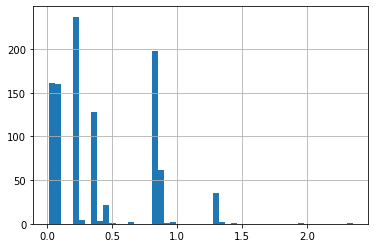

In [19]:
train_1.loc[(train_1['hl']==1) & train_1['preciptotal']>0, 'preciptotal'].hist(bins=50)

<AxesSubplot:>

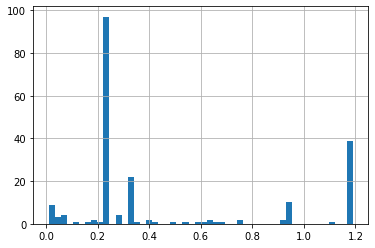

In [20]:
train_1.loc[(train_1['hl']==0) & train_1['preciptotal']>0, 'preciptotal'].hist(bins=50)

In [16]:
# Only August values

train_1 = merge_df.loc[merge_df['month']==8,:]

x = train_1[['tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'sunrise', 'sunset', 'bc', 'br', 'dz', 'fg', 'fg+',
       'fu', 'hz', 'mi', 'ra', 'sn', 'sq', 'ts', 'vc']]
y = train_1['hl']

In [21]:
# Step 2: Instantiate our model.
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(x, y)

C:\Users\User\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
logreg.score(x, y)

0.7823290453622207

In [23]:
pd.DataFrame(data = logreg.coef_,
             columns = list(x.columns)).T.sort_values(0)

,0
ra,-1.154160
resultspeed,-1.123551
stnpressure,-0.330432
sunrise,-0.239914
dewpoint,-0.198106
sealevel,-0.181503
cool,-0.123829
sunset,-0.109036
wetbulb,-0.083070
heat,-0.076294


In [24]:
train_1.groupby('hl').mean().T

hl,0,1
latitude,41.838841,41.837138
longitude,-87.697361,-87.685539
nummosquitos,6.874515,26.667678
wnvpresent,0.034929,0.139605
wnvcount,0.042691,0.174001
station,1.788876,1.832127
sprayed,0.000000,0.004552
tmax,81.269012,84.071394
tmin,64.592509,68.035215
tavg,72.930760,76.053304
